In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

In [96]:
df = pd.read_csv('wine-quality-white-and-red.csv')

In [97]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [98]:
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [99]:
# Function to check if a row satisfies the constraints
def check_constraints(row):
    # Fixed Acidity constraint: 3.5 < Fixed Acidity < 16
    if row['fixed acidity'] < 3.5 or row['fixed acidity'] > 16:
            return -1
    
    # Volatile Acidity constraint: 0.05 < Volatile Acidity < 1.6
    if row['volatile acidity'] < 0.05 or row['volatile acidity'] > 1.6:
            return -1
        
    # Citric Acid constraint: 0.0 < Citric Acid < 1.7
    if row['citric acid'] < 0 or row['citric acid'] > 1.7:
            return -1
        
    # Residual Sugar constraint: 0.5 < Residual Sugar < 70
    if row['residual sugar'] < 0.5 or row['residual sugar'] > 70:
            return -1
        
    # Chlorides constraint: 0.0 < Chlorides < 0.65
    if row['chlorides'] < 0 or row['chlorides'] > 0.65:
            return -1
        
    # Free Sulfur Dioxide constraint: 0.5 < Free Sulfur Dioxide < 300
    if row['free sulfur dioxide'] < 0.5 or row['free sulfur dioxide'] > 300:
            return -1
    
    # Total Sulfur Dioxide constraint: 5 < Total Sulfur Dioxide < 450
    if row['total sulfur dioxide'] < 5 or row['total sulfur dioxide'] > 450:
            return -1
    
    # Density constraint: 0.98 < Density < 1.05
    if row['density'] < 0.98 or row['density'] > 1.05:
            return -1
    
    # pH constraint: 2.7 < pH < 4.1
    if row['pH'] < 2.7 or row['pH'] > 4.1:
            return -1
    
    # Sulphates constraint: 0.1 < Sulphates < 2.1
    if row['sulphates'] < 0.1 or row['sulphates'] > 2.1:
            return -1
    
    # Alcohol constraint: 7% < Alcohol < 15%
    if row['alcohol'] < 7 or row['alcohol'] > 15:
            return -1
    
    # If all constraints are satisfied, return 1
    return 1


In [100]:
# Apply the constraint check to each row
df['valid'] = df.apply(check_constraints, axis=1)

# Show rows that fail the constraints
invalid_rows = df[df['valid'] == -1]
invalid_rows

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,valid


In [101]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Ground truth: Assume all data points are valid (True)
# y_true = [True] * len(df)

# # Predictions: Based on our constraint checks
# y_pred = df['valid']

# # Calculate metrics
# accuracy = accuracy_score(y_true, y_pred)
# precision = precision_score(y_true, y_pred)
# recall = recall_score(y_true, y_pred)
# f1 = f1_score(y_true, y_pred)

# # Print the results
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")

In [102]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a copy of the dataset and randomly mutate 1% of the rows
df_mutated = df.copy()
num_mutations = int(0.01 * len(df))  # Mutate 1% of rows
mutation_indices = np.random.choice(df.index, size=num_mutations, replace=False)

# Mutate by adding large random values to 'fixed acidity'
df_mutated.loc[mutation_indices, 'fixed acidity'] = np.random.uniform(20, 25, size=num_mutations)

# Ground truth: Now, we assume the mutated rows are invalid (-1), others are valid (1)
y_true = np.ones(len(df), dtype=int)  # Default all rows as valid (1)
y_true[mutation_indices] = -1         # Mark mutated rows as invalid (-1)

# Predictions: Based on our constraint checks
y_pred = df_mutated.apply(check_constraints, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [103]:
# Print the first 20 ground truth labels
print(y_true[:20])

# Print the first 20 predicted labels
print(y_pred[:20])

[ 1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1]
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9    -1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18   -1
19    1
dtype: int64


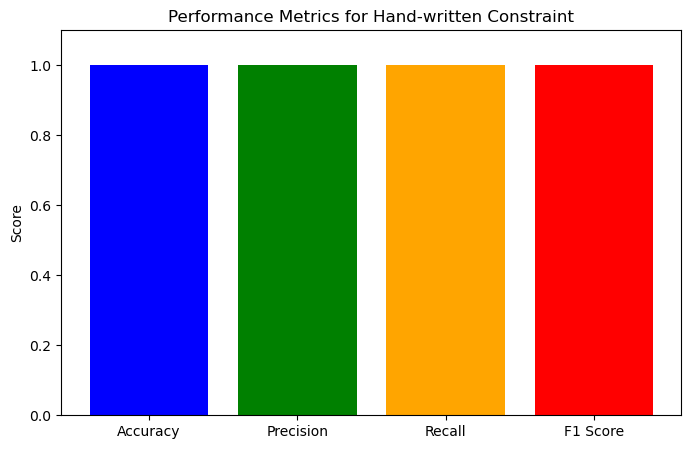

In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Plot the metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1.1)  # Set y-axis limits from 0 to 1.1
plt.title('Performance Metrics for Hand-written Constraint')
plt.ylabel('Score')
plt.show()

Unique values in y_true: [-1  1]
Unique values in y_pred: [-1  1]


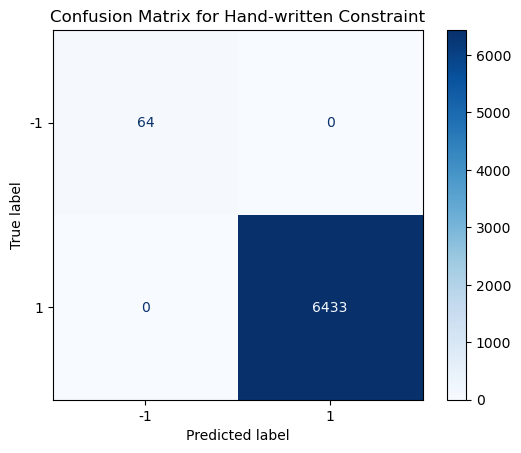

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Check the unique values in y_true and y_pred
print(f"Unique values in y_true: {np.unique(y_true)}")
print(f"Unique values in y_pred: {np.unique(y_pred)}")

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Handle case where only one class is present
if len(np.unique(y_true)) == 1 or len(np.unique(y_pred)) == 1:
    # Only one class in ground truth or predictions
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
else:
    # Both classes are present
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[-1, 1])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Hand-written Constraint')
plt.show()